In [1]:
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning) 
simplefilter("ignore", category=UserWarning)
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from apply_template import apply_n_template
from immunova.data.mongo_setup import pd_init
pd_init()

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.808
...proportion of parent: 0.808
New population: debris
...proportion of total events: 0.192
...proportion of parent: 0.192
-----------------------
Applying CD45_gate...
------ CD45_gate ------
New population: CD45+
...proportion of total events: 0.040
...proportion of parent: 0.049
New population: CD45-
...proportion of total events: 0.768
...proportion of parent: 0.951
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.002
...proportion of parent: 0.051
New population: Live_CD45+
...proportion of total events: 0.038
...proportion of parent: 0.949
-----------------------
Applying singlets_gate...
------ singlets_gate ------
New population: doublets
...proportion of total events: 0.004
...proportion of parent: 0.100
New population: Single_Live_CD45+
...proportion of total events: 0.034
...proportion of parent: 0.90

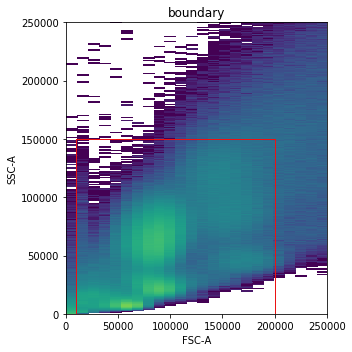

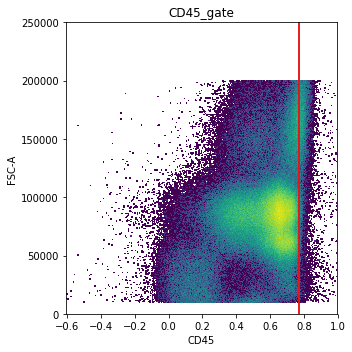

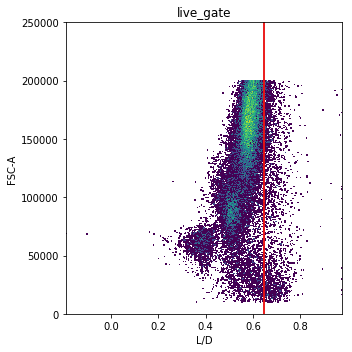

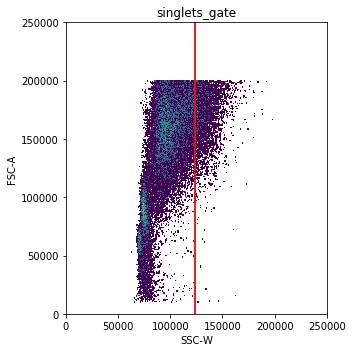

In [2]:
t = apply_n_template(sample_id='310-01_pdmc_n')

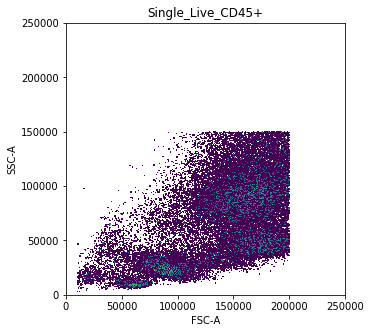

In [3]:
t.plotting.plot_population('Single_Live_CD45+', 'FSC-A', 'SSC-A', transforms={'x': None, 'y': None})

Editing gate: CD45_gate
Updating CD45+
Updating CD45-
The following gates are downstream of CD45_gate and will need to be applied again: ['live_gate', 'singlets_gate']
Edit complete!


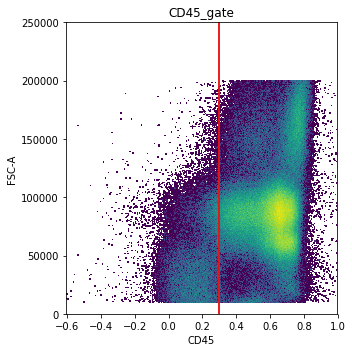

In [4]:
p, n = t.fetch_geom('CD45+'), t.fetch_geom('CD45-')
k = 'threshold'
p[k], n[k] = 0.3, 0.3
t.edit_gate('CD45_gate', updated_geom={'CD45+': p, 'CD45-': n})
t.plotting.plot_gate('CD45_gate')

------ live_gate ------
New population: dead
...proportion of total events: 0.037
...proportion of parent: 0.051
New population: Live_CD45+
...proportion of total events: 0.699
...proportion of parent: 0.949
-----------------------


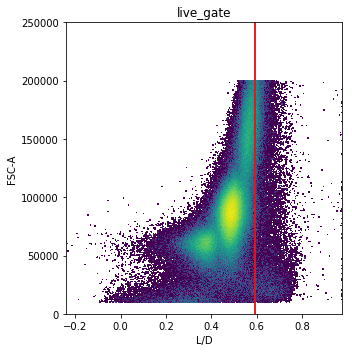

In [5]:
t.apply('live_gate')

------ singlets_gate ------
New population: doublets
...proportion of total events: 0.070
...proportion of parent: 0.100
New population: Single_Live_CD45+
...proportion of total events: 0.629
...proportion of parent: 0.900
-----------------------


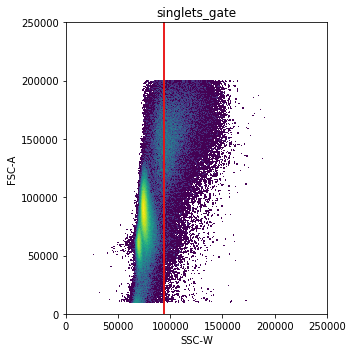

In [6]:
t.apply('singlets_gate')

In [7]:
t.save(overwrite=True)

Saved successfully!


True